# TASKS FOR FUNDAMENTALS OF DATA ANALYSIS
## Author : Michael Allen

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import seaborn as sns

## First Task : COLLATZ CONJECTURE

***
My task is to verify, using Python, that the conjecture is true for
the first 10,000 positive integers.

In [2]:
def f(x):
        if (x % 2) == 0: #if the number is divided by 2 with remainder equal to zero 
            return (x // 2)      
         
        else: # else if the number is divided 2 with remainder not equal to zero
            return (x * 3) + 1

In [3]:
def collatz(x):
    print()
    print(f'Testing Collatz with initial value {x}')
    while x != 1:
        x=f(x)
        print(x, end=" ")
    if x==1:
        print()
        

In [4]:
x=10000
while x>=1:
    if x % 1000 == 0:
        collatz(x)
        x=x-1
    else:
        x=x-1
        


Testing Collatz with initial value 10000
5000 2500 1250 625 1876 938 469 1408 704 352 176 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 

Testing Collatz with initial value 9000
4500 2250 1125 3376 1688 844 422 211 634 317 952 476 238 119 358 179 538 269 808 404 202 101 304 152 76 38 19 58 29 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1 

Testing Collatz with initial value 8000
4000 2000 1000 500 250 125 376 188 94 47 142 71 214 107 322 161 484 242 121 364 182 91 274 137 412 206 103 310 155 466 233 700 350 175 526 263 790 395 1186 593 1780 890 445 1336 668 334 167 502 251 754 377 1132 566 283 850 425 1276 638 319 958 479 1438 719 2158 1079 3238 1619 4858 2429 7288 3644 1822 911 2734 1367 4102 2051 6154 3077 9232 4616 2308 1154 577 1732 866 433 1300 650 325 976 488 244 122 61 184 92 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1 

Testing Collatz with initial value 7000
3500 1750 875 2626 1313 3940 1970 985 2956 1478 739 2218 1109 3328 1664 832 416 208 104 52 26 13 40 20 10 5 1

## Second Task : Types of variables
***

Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables
that should be used to model them in Python, explaining your rationale


In [5]:
penguins = pd.read_excel('./data/penguins.xlsx')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

I need to change the data type of flipper_length_mm and body_mass_g from a float to an integer.

In [8]:
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].astype('Int64')
penguins['body_mass_g'] = penguins['body_mass_g'].astype('Int64')

Let's check that that worked

In [9]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      Int64
body_mass_g            Int64
sex                   object
dtype: object

- Species has 3 categories : Adélie, Chinstrap and Gentoo
- Island also has 3 categories : Biscoe, Dream or Torgersen
- bill_length_mm is a float with one decimal place.
- bill_depth_mm is a float with one decimal place.
- flipper_length_mm is an integer denoting flipper length (millimeters)
- body_mass_g is an integer denoting body mass (grams)
- sex is a categorical variable with 2 categories : male and female.

## Third Task : Probability Distributions
***

For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

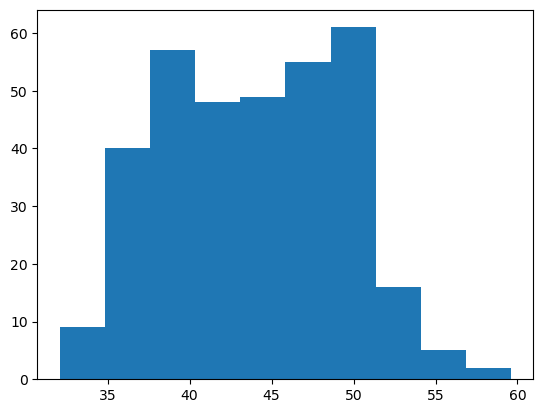

In [10]:
bill_length = penguins.bill_length_mm
n, bins, patches = plt.hist(bill_length)

In [11]:
n, bins

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]))

In [12]:
bill_length.mean()

43.92192982456142

### The normal disribution is the most appropriate distribution to model the variable : bill_length_mm . 
It's shaped like a bell curve. 
As you can see, the bins in the center of the distribution contain most of the values for bill_length_mm.
As you go further from the mean of 43.92192982456142, the number of values in the bins get smaller and smaller.

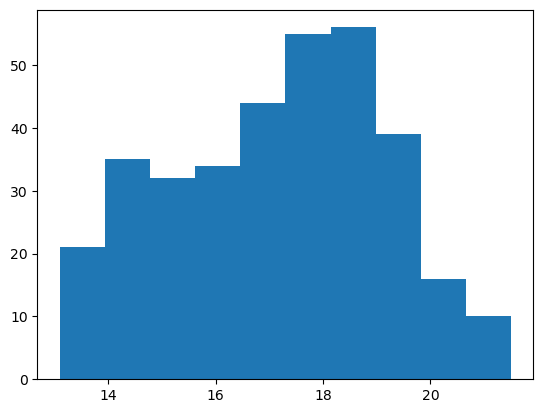

In [13]:
bill_depth = penguins.bill_depth_mm
n, bins, patches = plt.hist(bill_depth)

In [14]:
n, bins

(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]))

In [15]:
bill_depth.mean()

17.151169590643278

### bill_depth is a normal disribution. 
It's shaped like a bell curve. 
It's shaped like a bell curve.
As you can see, the bins in the center of the distribution contain most of the values.
As you go further from the mean of 17.151169590643278, the number of values in the bins get smaller and smaller.

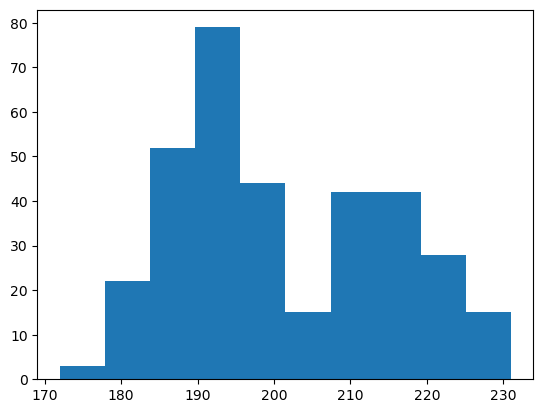

In [16]:
flipper_length = penguins.flipper_length_mm
#plt.hist(flipper_length)
n, bins, patches = plt.hist(flipper_length[~np.isnan(flipper_length)])

In [17]:
n, bins

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172.0, 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231.0], dtype=object))

In [18]:
flipper_length.mean()

200.91520467836258

### flipper_length_mm is 2 normal disributions side-by-side.
It's shaped like 2 bell curves.
As you can see, there are two peaks.
The number of values in each bin(n) gets bigger and smaller and bigger and smaller. Like a wave. Up and down. And Up and down again.

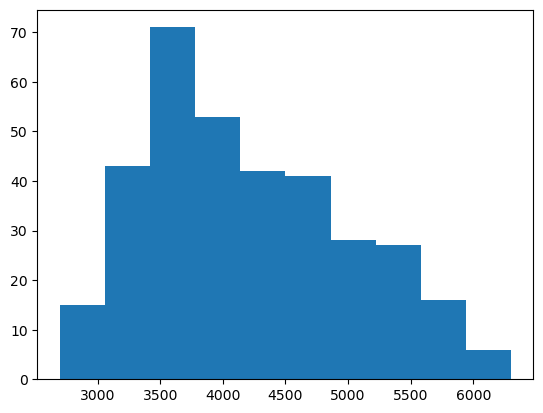

In [19]:
body_mass = penguins.body_mass_g
#plt.hist(body_mass)
n, bins, patches = plt.hist(body_mass[~np.isnan(body_mass)])

In [20]:
n, bins

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700.0, 3060.0, 3420.0, 3780.0, 4140.0, 4500.0, 4860.0, 5220.0,
        5580.0, 5940.0, 6300.0], dtype=object))

In [21]:
body_mass.mean()

4201.754385964912

In [22]:
body_mass.std()

801.9545356980956

### body_mass is a normal disribution. 
It's shaped like a bell curve.
As you can see, the bins in the center of the distribution contain most of the values.
As you go further from the mean of 4201.754385964912, the number of values in the bins get smaller and smaller. 

In [23]:
body_mass.replace([np.inf, -np.inf], np.nan, inplace=True)
body_mass.dropna(how="any", inplace=True)

In [24]:
#data = body_mass.dropna()
#data

In [25]:
#penguins.dropna()

In [26]:
np.isnan(body_mass).any()

False

In [27]:
body_mass.size

342

(array([3.34314587e-05, 3.34314587e-05, 1.67157294e-05, 5.01471881e-05,
        1.17010106e-04, 2.00588752e-04, 3.00883129e-04, 1.33725835e-04,
        2.84167399e-04, 3.34314587e-04, 5.18187610e-04, 5.34903340e-04,
        5.01471881e-04, 5.01471881e-04, 5.01471881e-04, 5.01471881e-04,
        2.84167399e-04, 1.83873023e-04, 2.50735940e-04, 1.17010106e-04,
        6.68629175e-05, 1.00294376e-04, 1.17010106e-04, 0.00000000e+00,
        3.34314587e-05]),
 array([1978.04319125, 2152.96685413, 2327.890517  , 2502.81417988,
        2677.73784276, 2852.66150564, 3027.58516852, 3202.50883139,
        3377.43249427, 3552.35615715, 3727.27982003, 3902.20348291,
        4077.12714578, 4252.05080866, 4426.97447154, 4601.89813442,
        4776.8217973 , 4951.74546017, 5126.66912305, 5301.59278593,
        5476.51644881, 5651.44011169, 5826.36377456, 6001.28743744,
        6176.21110032, 6351.1347632 ]),
 <BarContainer object of 25 artists>)

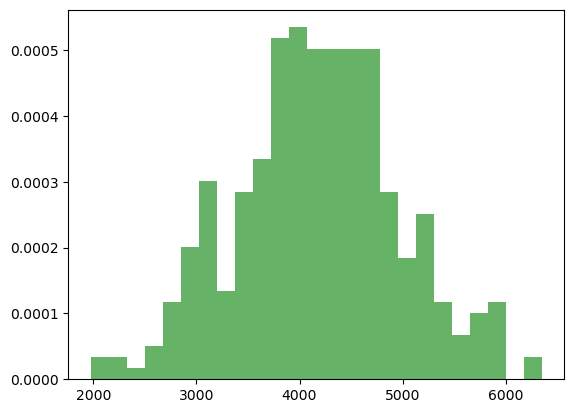

In [28]:
data = norm.rvs(4201.754385964912, 801.9545356980955, size=342)
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

In [29]:
# Plot the PDF.
#xmin, xmax = plt.xlim()
body_mass.min()

2700

In [30]:
data.min()

1978.043191248276

In [31]:
body_mass.max()

6300

In [32]:
data.max()

6351.134763197333

Text(0.5, 1.0, 'Fit results: mu = 4176.56,  std = 787.34')

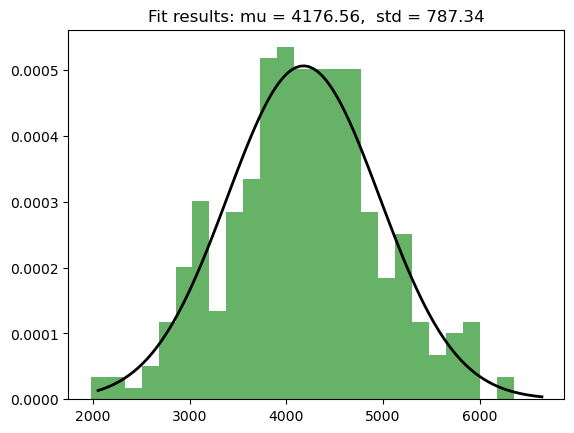

In [33]:
x = np.linspace(2051, 6644, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

In [34]:
#from scipy import stats
#dist = stats.norm
#data = body_mass
#bounds = [(170, 240), (0, 90)]
#res = stats.fit(dist, data, bounds)
#res

In [35]:
np.isinf(body_mass).any()

False

In [36]:
body_mass.dtype

Int64Dtype()

In [37]:
body_mass.mean()

4201.754385964912

In [38]:
body_mass.std()

801.9545356980955

## TASK 4 : Flipping 2 coins
***
Description : Suppose you are flipping two coins, each with a probability p of
giving heads. Plot the entropy of the total number of heads versus
p.

The distribution of coin flips can be described by a binomial distribution. The probability of getting heads (or tails) is constant for all coin tosses: p = 1/21. The binomial distribution consists of the probabilities of each of the possible numbers of successes on N trials for independent events that each have a probability of π (the Greek letter pi) of occurring2. When the probability of heads is 50%, the distribution closely resembles a normal distribution as the number of trials and the number of coin flips per trial increase

The probability of getting one head from flipping one coin is 0.5.
In other words, each coin has a probability of 0.5 of giving heads

In [39]:
p = .5 * .5
p
#rng = np.random.default_rng()
#n, p = 5, .25  # number of trials, probability of each trial
#s = rng.binomial(n, p, 1000)
# result of flipping 2 coin 5 times, tested 1000 times.

0.25

The probability of getting one head from flipping 2 coins is 0.25(.5 * .5)
The probability of getting 2 heads from flipping 2 coins is 0.5 (0.25 + 0.25)

In [40]:
rng = np.random.default_rng()
n, p = 10, 0.25  # number of trials, probability of each trial
s = rng.binomial(n, p, 100000)
s
# result of flipping 2 coins, tested 1000 times.

array([2, 4, 3, ..., 2, 1, 2], dtype=int64)

Text(0, 0.5, 'Number of trials with x heads')

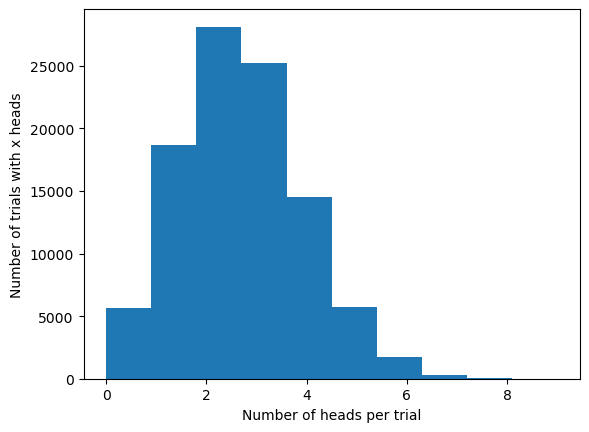

In [41]:
plt.hist(s)
plt.xlabel("Number of heads per trial")
plt.ylabel("Number of trials with x heads")

In [42]:
mu = s.mean()

In [43]:
std = s.std()

Text(0.5, 1.0, 'Fit results: mu = 2.50,  std = 1.37')

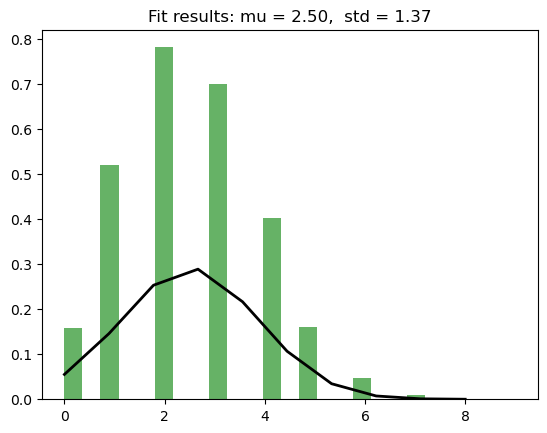

In [44]:
x = np.linspace(0, 8, 10)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.hist(s, bins=25, density=True, alpha=0.6, color='g')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

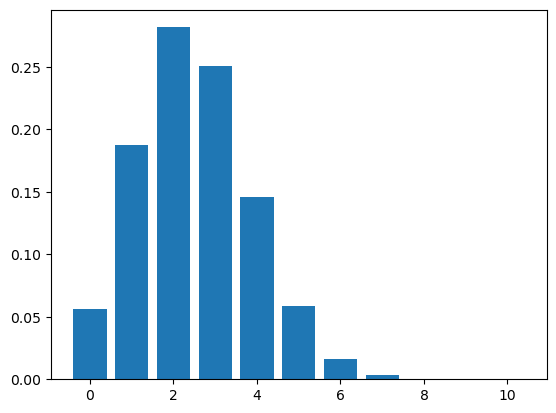

In [45]:
# setting the values 
# of n and p 
n = 10
p = 0.25
# defining list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.bar(r_values, dist) 
plt.show()

##### Calculate the first four moments:

In [46]:
n, p = 10, 0.25
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

##### Display the probability mass function (pmf):

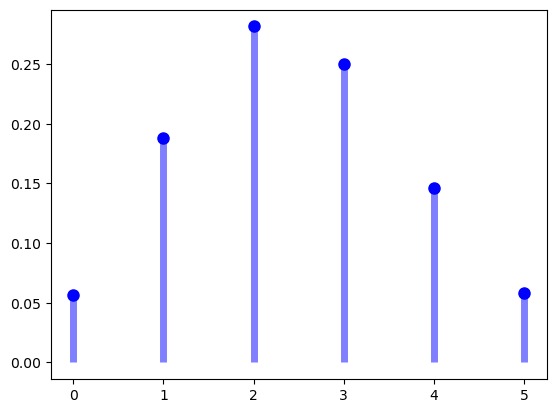

In [47]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

##### Check accuracy

In [48]:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

##### Generate random numbers

In [49]:
r = binom.rvs(n, p, size=1000)
r

array([1, 2, 2, 1, 4, 1, 1, 1, 2, 4, 1, 0, 1, 2, 1, 5, 1, 4, 3, 1, 4, 3,
       4, 2, 3, 2, 2, 2, 2, 4, 3, 1, 3, 3, 5, 5, 2, 2, 6, 2, 3, 2, 2, 3,
       0, 2, 3, 0, 4, 0, 3, 4, 4, 2, 1, 1, 3, 5, 3, 3, 4, 2, 2, 4, 4, 5,
       0, 1, 6, 3, 3, 3, 3, 5, 1, 2, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2, 2, 2,
       2, 4, 0, 5, 4, 0, 3, 0, 3, 4, 3, 1, 2, 2, 4, 6, 2, 2, 4, 2, 2, 3,
       3, 1, 1, 1, 0, 2, 1, 2, 2, 3, 0, 1, 1, 0, 2, 5, 1, 3, 4, 3, 3, 3,
       3, 3, 6, 4, 2, 2, 2, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 1, 3, 2, 4, 2,
       1, 1, 3, 4, 2, 4, 4, 4, 6, 0, 2, 4, 4, 1, 2, 2, 0, 1, 4, 4, 1, 2,
       6, 2, 6, 2, 4, 2, 2, 3, 1, 5, 3, 1, 3, 5, 2, 2, 3, 2, 0, 4, 3, 3,
       3, 2, 4, 1, 1, 3, 3, 1, 2, 5, 1, 4, 2, 4, 3, 5, 2, 1, 2, 1, 0, 2,
       4, 3, 1, 0, 3, 4, 3, 1, 5, 5, 2, 3, 7, 2, 3, 2, 1, 1, 5, 1, 5, 2,
       3, 4, 2, 2, 2, 3, 4, 1, 4, 1, 4, 2, 2, 3, 1, 4, 2, 2, 3, 4, 1, 2,
       3, 4, 3, 4, 4, 1, 5, 2, 3, 5, 1, 1, 4, 6, 1, 1, 3, 4, 3, 5, 1, 6,
       3, 3, 1, 3, 1, 4, 4, 1, 1, 2, 4, 2, 3, 3, 4,

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

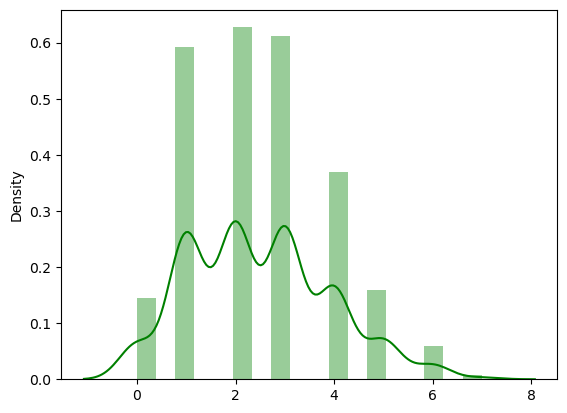

In [50]:
sns.distplot(r, kde = True, color = "g")

## TASK 5 : Plot variables
***
Create an appropriate individual plot for each of the variables in
the penguin data set.

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

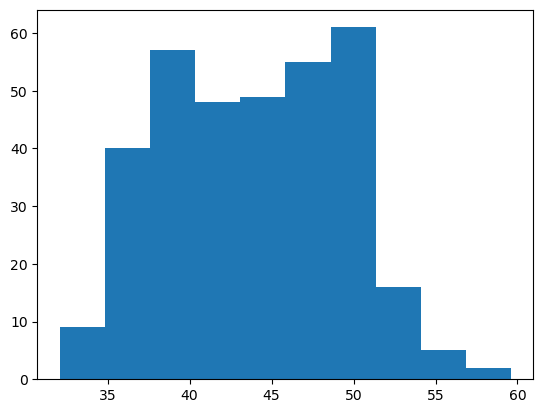

In [51]:
bill_length = penguins.bill_length_mm
plt.hist(bill_length)

(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

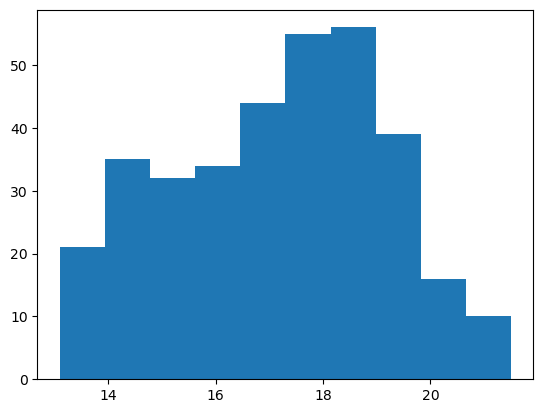

In [52]:
#bill_length = penguins.bill_length_mm
plt.hist(penguins.bill_depth_mm)

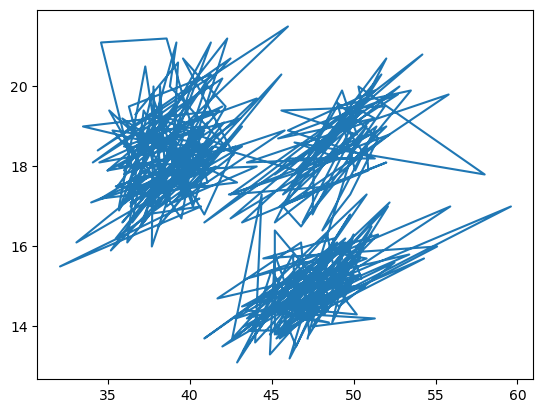

In [53]:
plt.plot(penguins.bill_length_mm,penguins.bill_depth_mm )

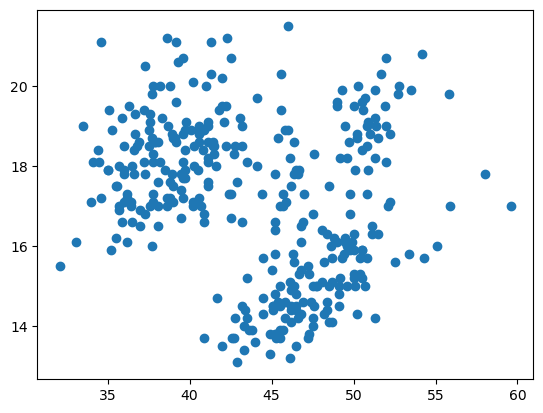

In [54]:
#bill_length = penguins.bill_length_mm
plt.scatter(penguins.bill_length_mm,penguins.bill_depth_mm)
#for name, group in penguins.groupby("species"):
#    plt.scatter(group.index, ratio[group.index], label=name)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

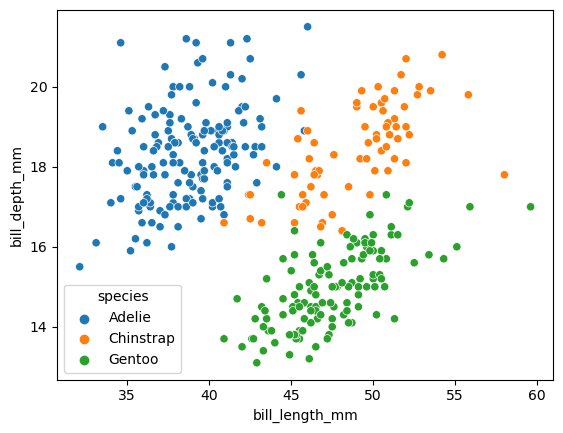

In [55]:
#sns.scatterplot(data = penguins)
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm', hue="species", data = penguins)

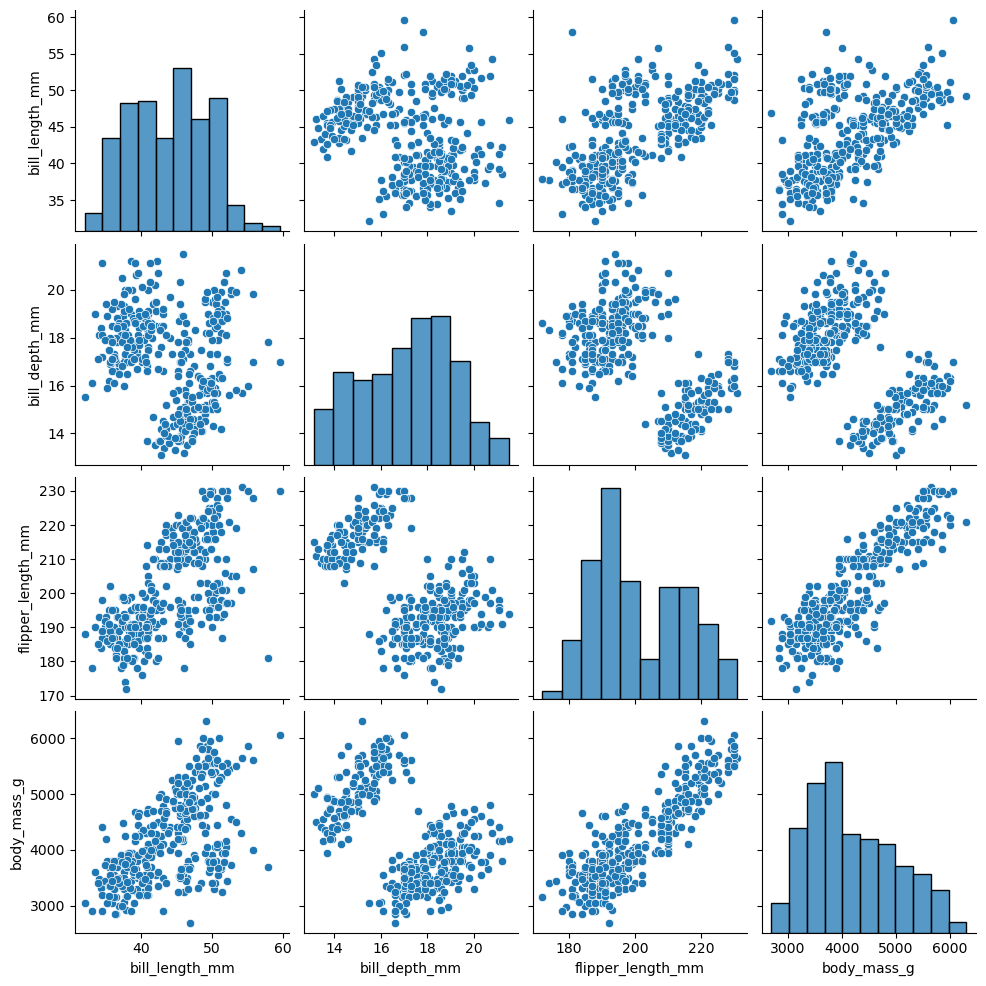

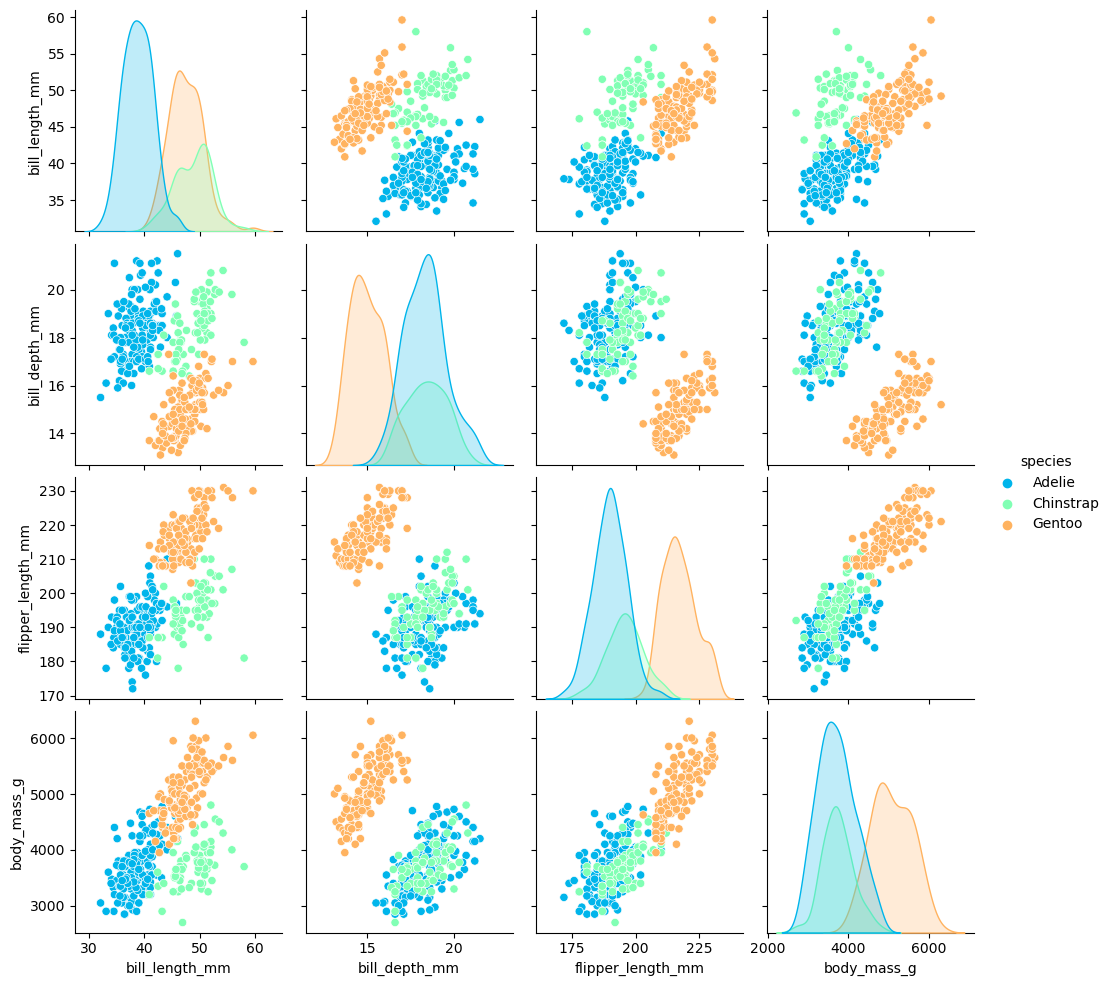

In [56]:
sns.pairplot(data = penguins)
sns.pairplot(penguins, hue="species", palette="rainbow")
plt.savefig('./img/pairplot.png')
plt.show()
plt.close()

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

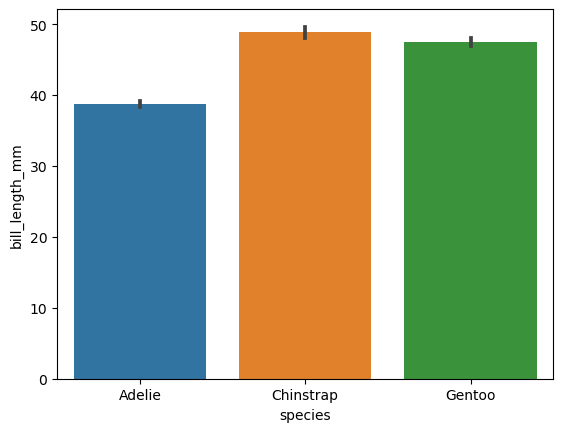

In [57]:
sns.barplot(x="species", y="bill_length_mm", data=penguins)

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

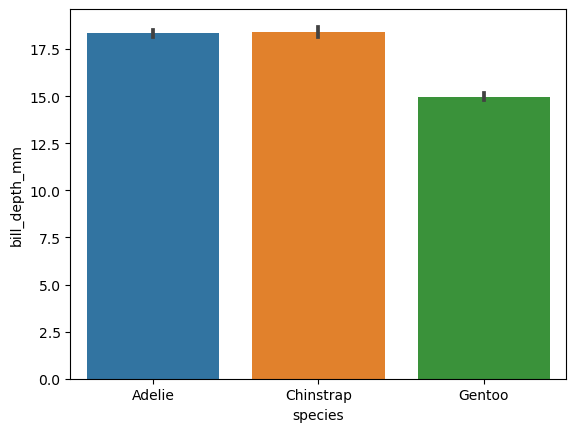

In [58]:
sns.barplot(x="species", y="bill_depth_mm", data=penguins)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

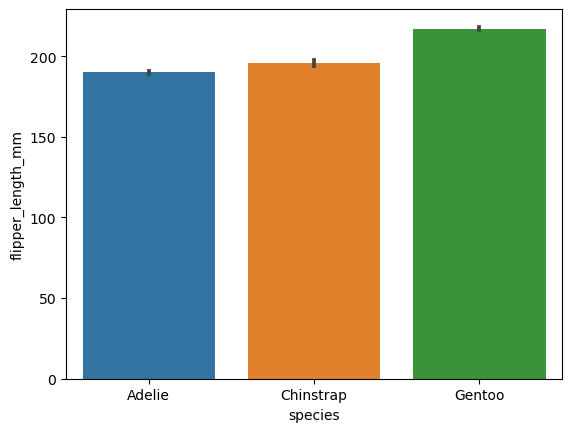

In [59]:
sns.barplot(x="species", y="flipper_length_mm", data=penguins)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

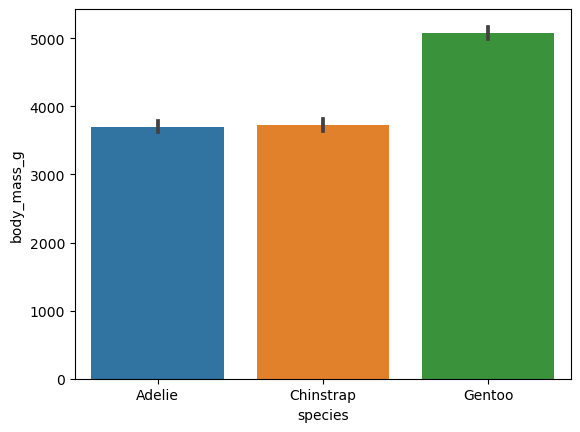

In [60]:
sns.barplot(x="species", y="body_mass_g", data=penguins)

# RESEARCH / REFERENCES

[1] Convert Pandas column containing NaNs to dtype `int`, Stackoverflow
https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

[2] Penguins Dataset Overview — iris alternative, Towards Data Science
https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95

[3] how to plot a histogram with nan?, Stackoverflow
https://stackoverflow.com/questions/54615686/how-to-plot-a-histogram-with-nan#:~:text=You%20can%20use%20numpy.isnan%20%28%29%20to%20choose%20only,to%20be%20np.nan%20for%20this%20to%20work%20though.%29

[4] Fitting a Normal distribution to 1D data, Stackoverflow
https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

[5] Types of Variable - Understanding the different types of variable in statistics, Laerd Statistics
https://statistics.laerd.com/statistical-guides/types-of-variable.php

[6] Binomial Distribution via Coin Flips, WOLFRAM TECHNOLOGIES
https://demonstrations.wolfram.com/BinomialDistributionViaCoinFlips/

[7] numpy.random.Generator.binomial API
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

[8] scipy.stats.binom API
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

***


# END